In [6]:
print("Name: {}, Email: [{}, {}], GithubID: {}".format("Daniel Borders", "dtborders@gmail.com", "dborder1@jhu.edu", "dtborders"))

Name: Daniel Borders, Email: [dtborders@gmail.com, dborder1@jhu.edu], GithubID: dtborders


In [8]:
! if [ ! -e orings.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv; \
fi

--2019-09-18 16:46:21--  https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/orings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 357 [text/plain]
Saving to: ‘orings.csv’

orings.csv          100%[===================>]     357  --.-KB/s    in 0s      

2019-09-18 16:46:21 (37.8 MB/s) - ‘orings.csv’ saved [357/357]



beta0=-0.391, beta1=-0.235
P(74 fails)=0.116


/Users/dannytb/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


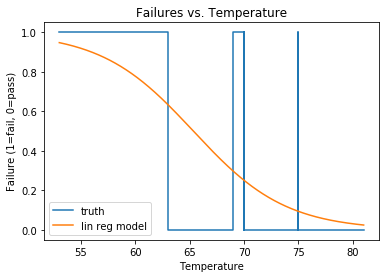

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import numpy as np
%matplotlib inline

#QUESTION 1

fl=pd.read_csv("orings.csv")

X=fl.Temperature

#Center X around the origin to make the Logistic regression pretty
shiftby=min(X)+(max(X)-min(X))/2
Xcen=list(map(lambda x: x-shiftby,X))

#Reduce Y to a binary 0 or 1 depending on if it has any amount of failures. 
Y=list(map(lambda x: 1 if x > 0 else 0, fl.Total))


Xarr=np.array(Xcen).reshape((-1,1))
Yarr=np.array(Y).reshape((-1,1))

plt.figure()
plt.step(X, Y)
plt.xlabel("Temperature")
plt.ylabel("Failure (1=fail, 0=pass)")
plt.title("Failures vs. Temperature")

lreg=lm.LogisticRegression(solver='liblinear').fit(Xarr,Yarr)

beta0, beta1 = [lreg.intercept_[0], lreg.coef_[0][0]]
print("beta0={0:0.3f}, beta1={1:0.3f}".format(beta0, beta1))

n = 1000
xplot = np.linspace(min(X), max(X), n)

regm = lambda x: 1 / (1 + np.exp(-(beta0 + beta1 * (x-shiftby))))

plt.plot(xplot, regm(xplot))
plt.legend(['truth', 'lin reg model'])

print("P(74 fails)={0:0.3f}".format(regm(74)))


## Question 2

$$log(\prod_{i}P(Y_i=1|X_i)^{Y_i}P(Y_i=0|X_i)^{1-Y_i})=\sum_i log(P(Y_i=1|X_i)^{Y_i}P(Y_i=0|X_i)^{1-Y_i})$$

$$\sum_ilog(\frac{e^{\beta_0(1 - X_i) +\beta_1X_i}}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}}^{Y_i}\frac{1}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}}^{1-Y_i})$$
<center>Since:</center>
$$P(Y_i=1|X_i)=e^{\beta_0(1 - X_i) +\beta_1X_i}/(1 + e^{\beta_0(1 - X_i) +\beta_1X_i})$$
$$P(Y_i=0|X_i)=1-P(Y_i=1|X_i)$$
<center>Thus:</center>
$$\sum_ilog(\frac{e^{\beta_0(1 - X_i) +\beta_1X_i}}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}}^{Y_i}\frac{1}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}}^{1}(1 + e^{\beta_0(1 - X_i) +\beta_1X_i})^{Y_i})$$
$$\sum_ilog((e^{\beta_0(1 - X_i) +\beta_1X_i})^{Y_i}\frac{1}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}})$$
$$\sum_ilog((e^{\beta_0(1 - X_i) +\beta_1X_i})^{Y_i})+log(\frac{1}{1 + e^{\beta_0(1 - X_i) +\beta_1X_i}})$$
$$\sum_iY_i(\beta_0(1 - X_i) +\beta_1X_i)-log(1 + e^{\beta_0(1 - X_i) +\beta_1X_i})$$

$$\sum_{istX_1=0}Y_i*\beta_0(1 - X_i)-log(1 + e^{\beta_0(1 - X_i)}) + \sum_{istX_1=1}Y_i*\beta_1X_i-log(1 + e^{\beta_1X_i})$$
$$\sum_{istX_1=0}Y_i*\beta_0-log(1 + e^{\beta_0}) + \sum_{istX_1=1}Y_i*\beta_1-log(1 + e^{\beta_1})$$

<center>Now differentiate:</center>
$$d/dB_1=\sum_{istX_1=0}Y_i-\frac{e^{\beta_0}}{1 + e^{\beta_0}}$$
<center>Doesnt depend on X_1 so we can get rid of the sum if we let n=(number of X_1) and $\bar Y_1=n^{-1}\sum_{i st X_i=1} Y_1$</center>
$$0=n\bar Y_1 - n*\frac {e^{\beta_1}}{1 + e^{\beta_1}}$$
$$\bar Y_1 = \frac {e^{\beta_1}}{1 + e^{\beta_1}}$$
$$\beta_1 = log(\frac {\bar Y_1}{1 - \bar Y_1})$$

<center>Using the same logic we can prove:</center>
$$\beta_0 = log(\frac {\bar Y_0}{1 - \bar Y_0})$$



In [82]:
#QUESTION 3
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y=True)

SL=[]
SW=[]
PL=[]
PW=[]
for x in X:
    SL.append(x[0])
    SW.append(x[1])
    PL.append(x[2])
    PW.append(x[3])
data={"Sepal Length":SL, "Sepal Width":SW, "Petal Length":PL, "Petal Width":PW, "Class":Y}

df=pd.DataFrame(data)
print(df.head(10))

   Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0
5           5.4          3.9           1.7          0.4      0
6           4.6          3.4           1.4          0.3      0
7           5.0          3.4           1.5          0.2      0
8           4.4          2.9           1.4          0.2      0
9           4.9          3.1           1.5          0.1      0
